# Top 10 Actors/Actresses


# 1. Import Data

In [1]:
import sqlite3
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bom_movie_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
tmbd = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
title_p =pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
title_b =pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
movies =pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

# Data Cleaning

Get the shape of data that is being used.

In [13]:
print(name_basics.shape)
print(title_p.shape)


(606648, 6)
(1028186, 6)


Clean names from the dataframe.

In [14]:
name_basics['nconst'].isna().sum()

0

Sort the name basics file.

In [15]:
name_basics = name_basics.sort_values(by=['primary_name'])

In [16]:
name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
334669,nm6950093,!'aru Ikhuisi Piet Berendse,NaN,NaN,NaN,tt4245110
480537,nm6750303,$hutter,NaN,NaN,actor,"tt4049298,tt1398426,tt2080374,tt1741273"
68747,nm10554376,'A.J.' Marriot,NaN,NaN,"writer,miscellaneous",NaN
177430,nm2764095,'Atlas' Ramachandran,NaN,NaN,"actor,director","tt3433162,tt1311658,tt2333760,tt0928194"
252452,nm5169037,'Atolomake Helu,NaN,NaN,NaN,tt1966622
...,...,...,...,...,...,...
251954,nm4964487,Þórir Bragason,NaN,NaN,composer,tt2316669
361353,nm8372002,Þórir Ingvarsson,NaN,NaN,"cinematographer,sound_department",tt5977838
93977,nm10211575,Þórunn Lárusdóttir,NaN,NaN,"actor,writer,editor",tt9174804
173454,nm1800527,Þórunn Lárusdóttir,NaN,NaN,"actress,director","tt9174804,tt5881406,tt0439436,tt1245694"


Find how many null values are in the dataframe.

In [48]:
name_basics['nconst'].isna().sum()

0

Search for dupilcates.

In [18]:
names_dupes = name_basics.loc[name_basics.duplicated(subset=['primary_name'],keep=False) == True]
names_dupes

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
129377,nm10275444,A. Venkatesh,NaN,NaN,director,tt9319898
387377,nm8956236,A. Venkatesh,NaN,NaN,producer,tt6834466
279631,nm4062141,A. Venkatesh,NaN,NaN,"director,actor,writer","tt4976496,tt6765648,tt4318038,tt6827080"
156216,nm1701176,A. Venkatesh,NaN,NaN,"cinematographer,camera_department,editor","tt0984177,tt0327761,tt0072026,tt4160030"
30159,nm0451160,A.J. Khan,1977.0,NaN,"actress,make_up_department,director","tt0203536,tt1651142,tt0367014,tt0323108"
...,...,...,...,...,...,...
433984,nm6356309,Özgür Bakar,NaN,NaN,"director,writer,producer","tt4368072,tt10046236,tt7717990,tt4764942"
102820,nm2561272,Øystein Mamen,NaN,NaN,"cinematographer,camera_department,editor","tt2713778,tt6275296,tt3541092,tt0966566"
603769,nm8122779,Øystein Mamen,NaN,NaN,cinematographer,tt2660730
93977,nm10211575,Þórunn Lárusdóttir,NaN,NaN,"actor,writer,editor",tt9174804


In [19]:
id_dupes = name_basics.loc[name_basics.duplicated(subset=['nconst'],keep=False) == True]
id_dupes

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles


Find the shapes of the name basics.

In [20]:

print(names_dupes.shape)
print(name_basics.shape)
print(50865/606648)

(50865, 6)
(606648, 6)
0.08384598646991336


Drop Duplicates.

In [21]:
name_basics = name_basics.drop_duplicates(subset=['primary_name'], keep=False,)

In [22]:
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
334669,nm6950093,!'aru Ikhuisi Piet Berendse,NaN,NaN,NaN,tt4245110
480537,nm6750303,$hutter,NaN,NaN,actor,"tt4049298,tt1398426,tt2080374,tt1741273"
68747,nm10554376,'A.J.' Marriot,NaN,NaN,"writer,miscellaneous",NaN
177430,nm2764095,'Atlas' Ramachandran,NaN,NaN,"actor,director","tt3433162,tt1311658,tt2333760,tt0928194"
252452,nm5169037,'Atolomake Helu,NaN,NaN,NaN,tt1966622
...,...,...,...,...,...,...
196669,nm1940028,Þórhallur Gunnarsson,NaN,NaN,"producer,actor","tt9100536,tt6770148,tt7690774,tt5038858"
276289,nm5352411,Þórhallur Þórhallsson,NaN,NaN,"actor,writer","tt3505804,tt5711254,tt7893482,tt5497896"
251954,nm4964487,Þórir Bragason,NaN,NaN,composer,tt2316669
361353,nm8372002,Þórir Ingvarsson,NaN,NaN,"cinematographer,sound_department",tt5977838


In [23]:
print(name_basics.shape)
print(606648-555783)

(555783, 6)
50865


In [24]:
title_p.columns.str.replace(' ', '')
title_p.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


Check for null values in title principles.

In [25]:

title_p['nconst'].isna().sum()

0

Sorting values in dataframe by nconst

In [26]:
title_p = title_p.sort_values(by=['nconst'])
title_p.head()

,tconst,ordering,nconst,category,job,characters
263152,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]"
15288,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]"
223302,tt0858500,2,nm0000002,actress,NaN,"[""May""]"
252036,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]"
229763,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]"


In [27]:
principals_dupes = title_p.loc[title_p.duplicated(subset=['nconst'],keep=False) == True]
principals_dupes.shape

(582339, 6)

Merging title principles and name basics into a single column.

In [9]:
principals_and_names = pd.merge(
    title_p,
    name_basics,
    how='inner',
    on ='nconst')
principals_and_names.head(30)

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
5,tt2081348,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
6,tt1414378,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
7,tt2712990,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
8,tt2395207,9,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
9,tt4566480,9,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


Filter out the professions that are not actors.

In [10]:
actors = principals_and_names[principals_and_names["primary_profession"].str.contains('actor|actress', na=False)]

In [30]:
actors.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
1,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
2,tt0858500,2,nm0000002,actress,NaN,"[""May""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
3,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
4,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"


Filter out birth years greater than 1939

In [11]:
 
actors = actors[actors['birth_year'] > 1939]
actors.sort_values(by=['birth_year'])

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
108183,tt2375005,9,nm0000448,self,NaN,"[""Himself""]",Lance Henriksen,1940.0,NaN,"actor,miscellaneous","tt0107076,tt0093605,tt0090605,tt0088247"
108179,tt1935072,3,nm0000448,self,NaN,"[""Himself""]",Lance Henriksen,1940.0,NaN,"actor,miscellaneous","tt0107076,tt0093605,tt0090605,tt0088247"
108178,tt1384961,2,nm0000448,actor,NaN,"[""Mulciber""]",Lance Henriksen,1940.0,NaN,"actor,miscellaneous","tt0107076,tt0093605,tt0090605,tt0088247"
108177,tt1528813,1,nm0000448,actor,NaN,"[""Mr. Darnell""]",Lance Henriksen,1940.0,NaN,"actor,miscellaneous","tt0107076,tt0093605,tt0090605,tt0088247"
108176,tt1558258,4,nm0000448,actor,NaN,"[""Father Reed""]",Lance Henriksen,1940.0,NaN,"actor,miscellaneous","tt0107076,tt0093605,tt0090605,tt0088247"
...,...,...,...,...,...,...,...,...,...,...,...
656421,tt4100182,2,nm6446418,actor,NaN,"[""Guyus""]",Gaius Lee DuPree,2013.0,NaN,"actor,cinematographer","tt4041788,tt3776720,tt4648810,tt4768296"
106804,tt10360096,3,nm10708650,actress,NaN,"[""Katie""]",Nayana Niter,2014.0,NaN,actress,NaN
942469,tt9396174,1,nm10306475,actress,NaN,"[""Monica""]",Natalye Archiles,2014.0,NaN,actress,"tt9392402,tt6877772,tt9396174"
942468,tt9392402,1,nm10306475,actress,NaN,"[""Buny""]",Natalye Archiles,2014.0,NaN,actress,"tt9392402,tt6877772,tt9396174"


Merge actors and their individual ratings. 

In [12]:
actors_and_ratings = pd.merge(
    actors,
    ratings,
    how='inner',
    on ='tconst')
actors_and_ratings

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",7.8,6
1,tt5573596,4,nm0000476,actress,NaN,NaN,Sally Kirkland,1941.0,NaN,"actress,producer,miscellaneous","tt0315327,tt0092569,tt3216866,tt0102138",7.8,6
2,tt5573596,3,nm0121007,actor,NaN,NaN,Eric Burdon,1941.0,NaN,"soundtrack,actor,composer","tt1478964,tt0443706,tt0118749,tt1408253",7.8,6
3,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358",3.9,2328
4,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383",3.9,2328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121526,tt6798460,4,nm8214951,actress,NaN,"[""Verka""]",Elizabet Nenova,1994.0,NaN,actress,"tt6798460,tt5583498",7.9,14
121527,tt6798460,8,nm7094029,actor,NaN,"[""Commissar Yagoda""]",Soufiane El Khalidy,1987.0,NaN,"actor,writer,director","tt6302538,tt6727598,tt6294226,tt1378167",7.9,14
121528,tt7808528,1,nm1190444,self,NaN,"[""Himself""]",Dikembe Mutombo,1966.0,NaN,actor,"tt0247444,tt5134400,tt7334528,tt0182576",9.2,26
121529,tt7808528,2,nm0645927,self,NaN,"[""Himself""]",Hakeem Olajuwon,1963.0,NaN,actor,"tt0104402,tt7808528,tt7257398,tt4225230",9.2,26


Clean the actors and ratings columns.

In [13]:
actors_and_ratings.columns.str.replace(' ', '')
actors_and_ratings.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",7.8,6
1,tt5573596,4,nm0000476,actress,NaN,NaN,Sally Kirkland,1941.0,NaN,"actress,producer,miscellaneous","tt0315327,tt0092569,tt3216866,tt0102138",7.8,6
2,tt5573596,3,nm0121007,actor,NaN,NaN,Eric Burdon,1941.0,NaN,"soundtrack,actor,composer","tt1478964,tt0443706,tt0118749,tt1408253",7.8,6
3,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358",3.9,2328
4,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383",3.9,2328


Drop the columns that are not needed.

In [14]:
actors_and_ratings = actors_and_ratings.drop(['ordering', 'job', 'characters', 'death_year', 'known_for_titles'], axis=1)
actors_and_ratings

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
0,tt5573596,nm0398271,director,Frank Howson,1952.0,"actor,writer,producer",7.8,6
1,tt5573596,nm0000476,actress,Sally Kirkland,1941.0,"actress,producer,miscellaneous",7.8,6
2,tt5573596,nm0121007,actor,Eric Burdon,1941.0,"soundtrack,actor,composer",7.8,6
3,tt0323808,nm0574615,actor,Graham McTavish,1961.0,"actor,soundtrack,director",3.9,2328
4,tt0323808,nm0502652,actress,Jacqueline Leonard,1967.0,actress,3.9,2328
...,...,...,...,...,...,...,...,...
121526,tt6798460,nm8214951,actress,Elizabet Nenova,1994.0,actress,7.9,14
121527,tt6798460,nm7094029,actor,Soufiane El Khalidy,1987.0,"actor,writer,director",7.9,14
121528,tt7808528,nm1190444,self,Dikembe Mutombo,1966.0,actor,9.2,26
121529,tt7808528,nm0645927,self,Hakeem Olajuwon,1963.0,actor,9.2,26


Filter out rows that are do not have "actor" or "actress" in "category" column.

In [15]:
actors_and_ratings = actors_and_ratings[actors_and_ratings["category"].str.contains('actor|actress', na=False)]
actors_and_ratings

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
1,tt5573596,nm0000476,actress,Sally Kirkland,1941.0,"actress,producer,miscellaneous",7.8,6
2,tt5573596,nm0121007,actor,Eric Burdon,1941.0,"soundtrack,actor,composer",7.8,6
3,tt0323808,nm0574615,actor,Graham McTavish,1961.0,"actor,soundtrack,director",3.9,2328
4,tt0323808,nm0502652,actress,Jacqueline Leonard,1967.0,actress,3.9,2328
5,tt1680140,nm0574615,actor,Graham McTavish,1961.0,"actor,soundtrack,director",5.1,777
...,...,...,...,...,...,...,...,...
121523,tt7935646,nm7487478,actress,Zeynep Tugçe Bayat,1990.0,"actress,soundtrack",5.0,473
121524,tt8178850,nm0596670,actress,Claudia Molina,1985.0,"actress,soundtrack",3.5,30
121526,tt6798460,nm8214951,actress,Elizabet Nenova,1994.0,actress,7.9,14
121527,tt6798460,nm7094029,actor,Soufiane El Khalidy,1987.0,"actor,writer,director",7.9,14


1.Making a new variable that stores average rating mutiplied by their votes.
2.Sort values by ascending.

In [16]:
actors_and_ratings['popularity_&_rating'] = actors_and_ratings['averagerating'] * actors_and_ratings['numvotes']
actors_and_ratings.sort_values(by=['popularity_&_rating'],ascending=False)

<ipython-input-16-b3585c45e334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors_and_ratings['popularity_&_rating'] = actors_and_ratings['averagerating'] * actors_and_ratings['numvotes']


,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes,popularity_&_rating
52206,tt1375666,nm0330687,actor,Joseph Gordon-Levitt,1981.0,"actor,producer,soundtrack",8.8,1841066,16201380.8
52203,tt1375666,nm0913822,actor,Ken Watanabe,1959.0,"actor,producer,director",8.8,1841066,16201380.8
52204,tt1375666,nm0000138,actor,Leonardo DiCaprio,1974.0,"actor,producer,writer",8.8,1841066,16201380.8
52205,tt1375666,nm0680983,actress,Ellen Page,1987.0,"actress,producer,soundtrack",8.8,1841066,16201380.8
4677,tt1345836,nm0000198,actor,Gary Oldman,1958.0,"actor,soundtrack,producer",8.4,1387769,11657259.6
...,...,...,...,...,...,...,...,...,...
110611,tt8446392,nm0129648,actress,Nathalie Caldonazzo,1969.0,actress,1.0,5,5.0
112502,tt6792126,nm2511348,actress,Anna Kulovaná,1981.0,actress,1.0,5,5.0
112499,tt6792126,nm0603184,actress,Dana Morávková,1971.0,"actress,soundtrack,miscellaneous",1.0,5,5.0
112501,tt6792126,nm1551077,actor,Ladislav Ondrej,1991.0,actor,1.0,5,5.0


Drop columns that are not needed.

In [17]:
simple_actors_and_ratings = actors_and_ratings.drop(['tconst','nconst','category','birth_year','primary_profession','averagerating','numvotes'], axis=1)
simple_actors_and_ratings.sort_values(by=['popularity_&_rating'],ascending=False)

,primary_name,popularity_&_rating
52206,Joseph Gordon-Levitt,16201380.8
52203,Ken Watanabe,16201380.8
52204,Leonardo DiCaprio,16201380.8
52205,Ellen Page,16201380.8
4677,Gary Oldman,11657259.6
...,...,...
110611,Nathalie Caldonazzo,5.0
112502,Anna Kulovaná,5.0
112499,Dana Morávková,5.0
112501,Ladislav Ondrej,5.0


1. Group primary name,mean, and count.
2. Find the mean of the popularity and reviews. 

In [21]:
actors_ranking = simple_actors_and_ratings.groupby(by=['primary_name']).agg(['mean','count'],as_index=False)
actors_ranking = actors_ranking.rename(columns={'mean':'pop_and_reviews','count':'count'})
actors_ranking.columns = actors_ranking.columns.droplevel(0)
actors_ranking = actors_ranking.sort_values(by=['pop_and_reviews'],ascending=False)
actors_ranking

,pop_and_reviews,count
primary_name,,
Leonardo DiCaprio,5199703.07,10
Idina Menzel,3877485.00,1
Robert Downey Jr.,3751983.99,13
Lucy Davis,3656452.50,1
Carrie Fisher,3286611.30,1
...,...,...
Yûichirô Hirose,6.00,1
Ladislav Ondrej,5.00,1
Anna Kulovaná,5.00,1


In [18]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

List out the top 10

In [22]:
top_10 = actors_ranking.head(10)
top_10

,pop_and_reviews,count
primary_name,,
Leonardo DiCaprio,5199703.07,10
Idina Menzel,3877485.00,1
Robert Downey Jr.,3751983.99,13
Lucy Davis,3656452.50,1
Carrie Fisher,3286611.30,1
Daniel Kaluuya,3083649.80,1
Tom Hardy,2985223.97,13
Donna Murphy,2857654.80,1
Ben Hardy,2763728.00,1


In [23]:
top_10

,pop_and_reviews,count
primary_name,,
Leonardo DiCaprio,5199703.07,10
Idina Menzel,3877485.00,1
Robert Downey Jr.,3751983.99,13
Lucy Davis,3656452.50,1
Carrie Fisher,3286611.30,1
Daniel Kaluuya,3083649.80,1
Tom Hardy,2985223.97,13
Donna Murphy,2857654.80,1
Ben Hardy,2763728.00,1


#  2.Plot Data

<function matplotlib.pyplot.show(close=None, block=None)>

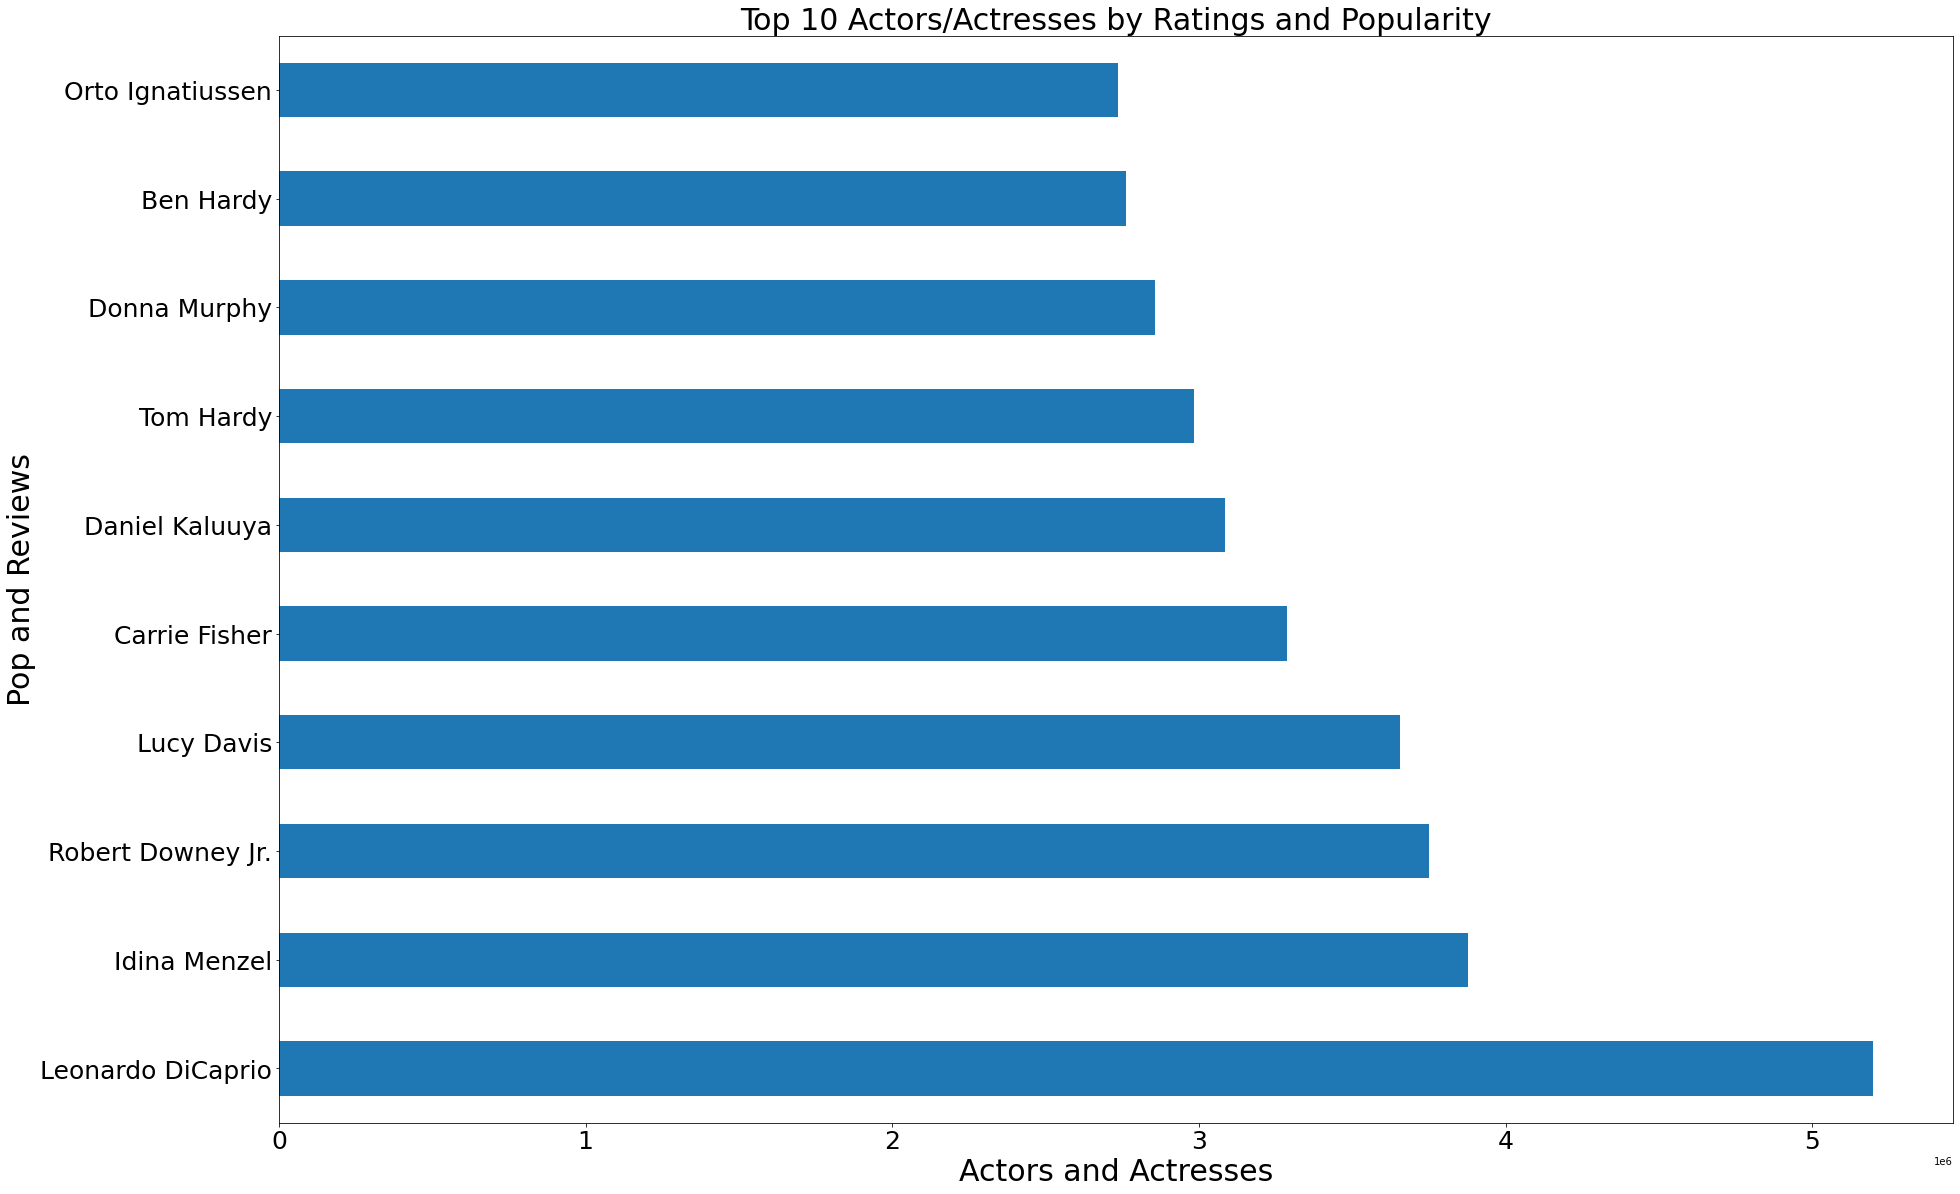

In [24]:
from matplotlib import pyplot as plt
top_10['pop_and_reviews'].plot(kind="barh",figsize=(30, 20),fontsize=25)
plt.title("Top 10 Actors/Actresses by Ratings and Popularity",fontsize=30)
plt.ylabel("Pop and Reviews",fontsize=30)
plt.xlabel("Actors and Actresses",fontsize=30)

plt.show
